# РЕАЛІЗАЦІЯ ЛОГІЧНИХ ФУНКЦІЙ

In [1]:
# Імпортуємо необхідні бібліотеки
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
import numpy as np
import matplotlib.pyplot as plt

# Реалізація логічної функції “І” (AND ∨ )

<div style="text-align: center; "> <Strong> Таблиця істиності </Strong> </div>

| **A** | **B** | **A AND B** |
|:-----:|:-----:|:-----------:|
|  0    |  0    |      0      |
|  0    |  1    |      0      |
|  1    |  0    |      0      |
|  1    |  1    |      1      |

In [2]:
# Визначення навчальних даних для логічної функції AND
# Вхідні дані (X) та вихідні дані (y)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],
              [0],
              [0],
              [1]])

Для реалізації логічної функції "І" достатньо одного нейрона

In [3]:
# Створення моделі нейронної мережі з одного нейрона
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(1, activation='hard_sigmoid', input_dim=2))

# Компільування моделі
from tensorflow.keras.optimizers import Adam
adam_optimizer = Adam(learning_rate=0.02)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import Callback

# Створення кастомного колбеку для зупинки при досягненні точності 1
class StopWhenAccuracyIsOne(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy')
        if accuracy == 1.0:
            print(f"\nДосягнуто точності 1.0 на епосі {epoch+1}. Зупинка навчання.")
            self.model.stop_training = True

# Навчання моделі з кастомним колбеком
model.fit(X, y, epochs=1000, callbacks=[StopWhenAccuracyIsOne()], verbose=1)

C:\Users\Max11mus\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.7567   
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.7517
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7500 - loss: 0.7467
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7500 - loss: 0.7418
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.7370
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7500 - loss: 0.7322
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.7275
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7500 - loss: 0.7228
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7500 - loss: 0.7182
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7500 - loss: 0.7136
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7500 - loss: 0.7091
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy

In [4]:
# Тестування моделі
print("Тестування моделі:")
predictions = model.predict(X)
for i, pred in enumerate(predictions):
    print(f"Вхід: {X[i]} => Прогноз: {np.round(pred[0])}, Фактичний: {y[i][0]}")

Тестування моделі:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Вхід: [0 0] => Прогноз: 0.0, Фактичний: 0
Вхід: [0 1] => Прогноз: 0.0, Фактичний: 0
Вхід: [1 0] => Прогноз: 0.0, Фактичний: 0
Вхід: [1 1] => Прогноз: 1.0, Фактичний: 1


In [5]:
# Виведення архітектури моделі
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [6]:
# Виведення ваг (коефіцієнтів) моделі
weights = model.get_weights()

# Виведення на екран ваг та зсувів
for i, weight in enumerate(weights):
    print(f"Ваги/Зсуви шару {i + 1}:")
    print(weight)



Ваги/Зсуви шару 1:
[[1.6546321]
 [1.5022869]]
Ваги/Зсуви шару 2:
[-3.1430852]


# Реалізація логічної функції “АБО” (OR ∧)

<div style="text-align: center; "> <Strong> Таблиця істиності </Strong> </div>

| **A** | **B** | **A OR B** |
|:-----:|:-----:|:-----------:|
|  0    |  0    |      0      |
|  0    |  1    |      1      |
|  1    |  0    |      1      |
|  1    |  1    |      1      |

In [7]:
# Визначення навчальних даних для логічної функції OR
# Вхідні дані (X) та вихідні дані (y)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],
              [1],
              [1],
              [1]])

# Створення моделі нейронної мережі з одного нейрона
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(1, activation='hard_sigmoid', input_dim=2))

# Компільування моделі
adam_optimizer = Adam(learning_rate=0.03)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import Callback

# Створення кастомного колбеку для зупинки при досягненні точності 1
class StopWhenAccuracyIsOne(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy')
        if accuracy == 1.0:
            print(f"\nДосягнуто точності 1.0 на епосі {epoch+1}. Зупинка навчання.")
            self.model.stop_training = True

# Навчання моделі з кастомним колбеком
model.fit(X, y, epochs=1000, callbacks=[StopWhenAccuracyIsOne()], verbose=1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 1.0000 - loss: 0.4051
Досягнуто точності 1.0 на епосі 1. Зупинка навчання.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step - accuracy: 1.0000 - loss: 0.4051


In [8]:
# Тестування моделі
print("Тестування моделі:")
predictions = model.predict(X)
for i, pred in enumerate(predictions):
    print(f"Вхід: {X[i]} => Прогноз: {np.round(pred[0])}, Фактичний: {y[i][0]}")

Тестування моделі:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Вхід: [0 0] => Прогноз: 1.0, Фактичний: 0
Вхід: [0 1] => Прогноз: 1.0, Фактичний: 1
Вхід: [1 0] => Прогноз: 1.0, Фактичний: 1
Вхід: [1 1] => Прогноз: 1.0, Фактичний: 1


# Реалізація логічної функції “ВИКЛЮЧНЕ АБО” (XOR ⊕)

<div style="text-align: center; "> <Strong> Таблиця істиності </Strong> </div>

| **A** | **B** | **A XOR B** |
|:-----:|:-----:|:-----------:|
|  0    |  0    |      0      |
|  0    |  1    |      1      |
|  1    |  0    |      1      |
|  1    |  1    |      0      |

Для реалізації логічної функції "ВИКЛЮЧНЕ АБО" недостатньо одного нейрона потрібно мінімум 3 нейрона

![Local image](assets/XOR.png)

Для першого шару з 2-х нейронів використовуємо функцію активації ELU

<img src="assets/ELU.png" alt="ELU" width="600"/>

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7295
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2500 - loss: 0.7253
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2500 - loss: 0.7215
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2500 - loss: 0.7181
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2500 - loss: 0.7150
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2500 - loss: 0.7123
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2500 - loss: 0.7099
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2500 - loss: 0.7077
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2500 - loss: 0.7057
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2500 - loss: 0.7039
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2500 - loss: 0.7023
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0

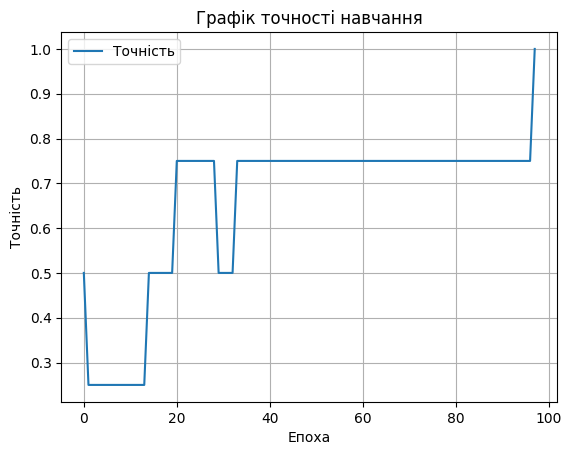

In [14]:
# Визначення навчальних даних для логічної функції XOR
# Вхідні дані (X) та вихідні дані (y)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

# Створення моделі нейронної мережі з 3-х нейронів
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(2, activation='elu', input_dim=2))
model.add(Dense(1, activation='hard_sigmoid', input_dim=2))

# Компільування моделі
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.025)

model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import Callback

# Створення кастомного колбеку для зупинки при досягненні точності 1
class StopWhenAccuracyIsOne(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy')
        if accuracy == 1.0:
            print(f"\nДосягнуто точності 1.0 на епосі {epoch+1}. Зупинка навчання.")
            self.model.stop_training = True

# Навчання моделі з кастомним колбеком
history = model.fit(X, y, epochs=1000, callbacks=[StopWhenAccuracyIsOne()], verbose=1)

# Графік точності
plt.plot(history.history['accuracy'], label='Точність')
plt.title('Графік точності навчання')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.grid()
plt.show()

In [20]:
# Виведення архітектури моделі
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (84.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11 (48.00 B)

In [13]:
# Тестування моделі
print("Тестування моделі:")
predictions = model.predict(X)
for i, pred in enumerate(predictions):
    print(f"Вхід: {X[i]} => Прогноз: {np.round(pred[0])}, Фактичний: {y[i][0]}")

Тестування моделі:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Вхід: [0 0] => Прогноз: 0.0, Фактичний: 0
Вхід: [0 1] => Прогноз: 1.0, Фактичний: 1
Вхід: [1 0] => Прогноз: 1.0, Фактичний: 1
Вхід: [1 1] => Прогноз: 0.0, Фактичний: 0


# АПРОКСИМАЦІЯ НЕПЕРЕРВНИХ ФУНКЦІЙ

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Генерація даних
def generate_data(num_samples):
    x1 = np.random.uniform(-10, 10, num_samples)
    x2 = np.random.uniform(-10, 10, num_samples)
    y = x1**2 + x2
    return np.column_stack((x1, x2)), y

# Параметри
num_samples = 1000
x_train, y_train = generate_data(num_samples)

# Створення моделі
model = keras.Sequential([
    layers.Input(shape=(2,)),  # Вхідний шар з 2 входами
    layers.Dense(4, activation='sigmoid'),  # Прихований шар 1
    layers.Dense(4, activation='sigmoid'),  # Прихований шар 2
    layers.Dense(1)  # Вихідний шар
])

# Компіляція моделі
model.compile(optimizer='adam', loss='mean_squared_error')

# Навчання моделі
history = model.fit(x_train, y_train, epochs=200, verbose=1)

# Тестування моделі
x_test, y_test = generate_data(100)
y_pred = model.predict(x_test)



Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1882.1943
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2059.9419
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2008.1282
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1799.4962
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2058.4639
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1815.1698
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2053.4143
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1907.4683
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1793.7596
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1881.5502
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1962.0155
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1905.4673
Epoch 13/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1809.1775
Epoch 14/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1916.3115
Epoch 15/200
32/32 ━━━━━━━━━━

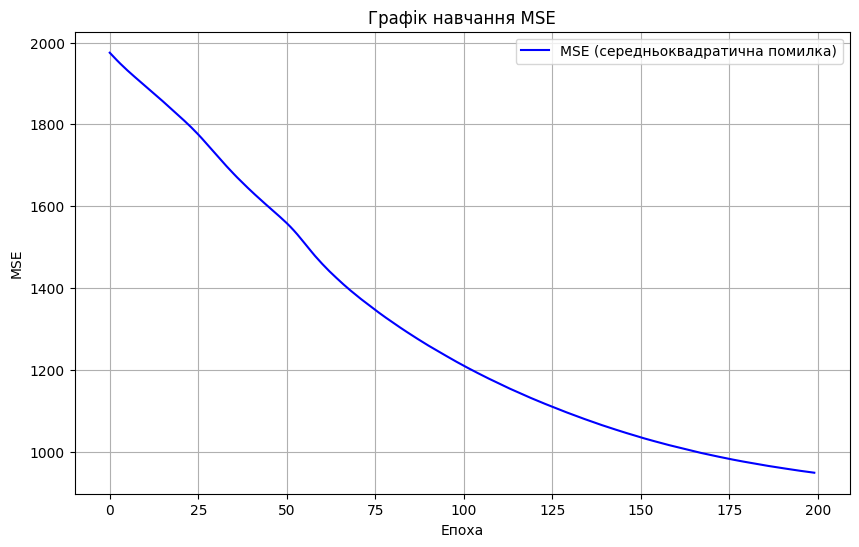

In [22]:
# Графік MSE
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='MSE (середньоквадратична помилка)', color='blue')
plt.title('Графік навчання MSE')
plt.xlabel('Епоха')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


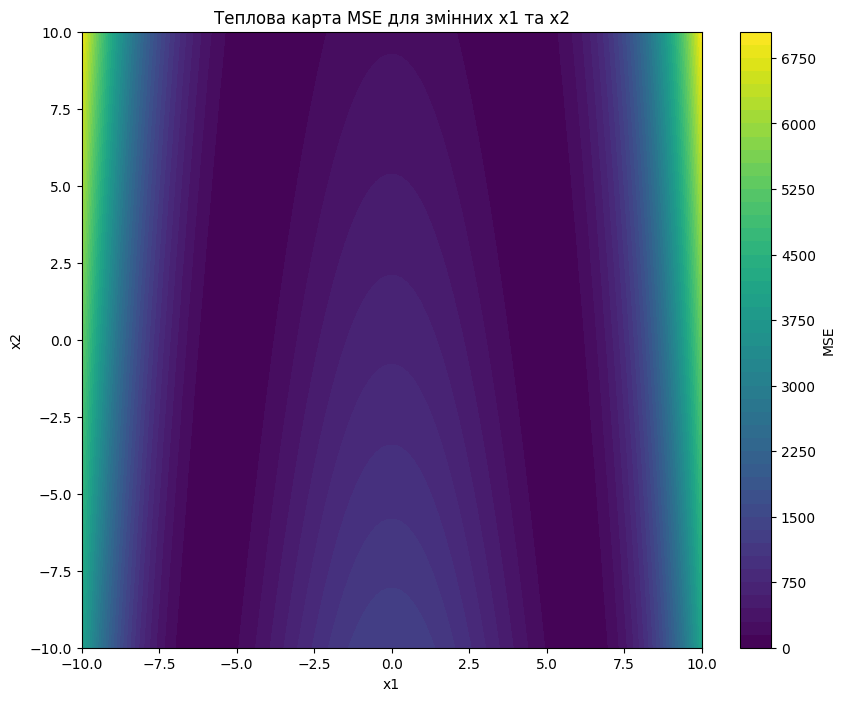

In [26]:
# Створення сітки значень для x1 та x2
x1_grid = np.linspace(-10, 10, 100)
x2_grid = np.linspace(-10, 10, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_grid, x2_grid)

# Обчислення прогнозів моделі для сітки точок
x_test_grid = np.column_stack((x1_mesh.flatten(), x2_mesh.flatten()))
y_true_grid = x_test_grid[:, 0]**2 + x_test_grid[:, 1]
y_pred_grid = model.predict(x_test_grid).flatten()

# Обчислення MSE для кожної точки сітки
mse_grid = (y_true_grid - y_pred_grid) ** 2
mse_grid = mse_grid.reshape(x1_mesh.shape)

# Побудова теплової карти
plt.figure(figsize=(10, 8))
plt.contourf(x1_mesh, x2_mesh, mse_grid, cmap='viridis', levels=50)
plt.colorbar(label='MSE')
plt.title('Теплова карта MSE для змінних x1 та x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# КЛАСТЕРІЗАЦІЯ ДАНИХ

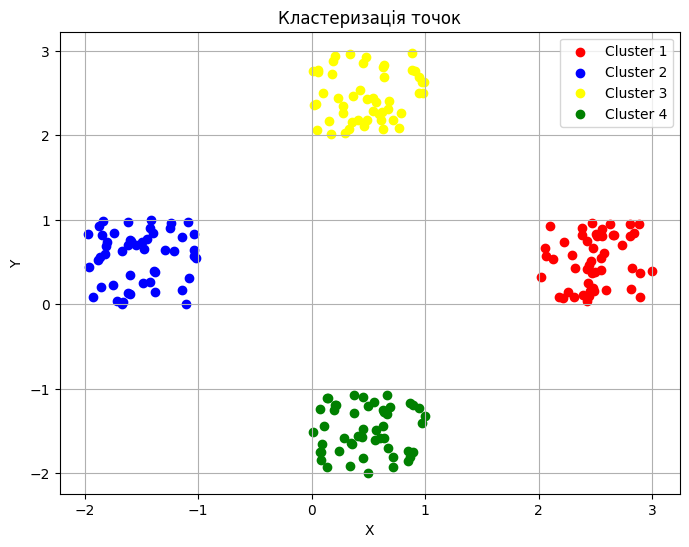

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Задаємо перший кластер (центр у точці (2, 0))
x1 = 2 + np.random.rand(50)
y1 = 0 + np.random.rand(50)

# Задаємо другий кластер (центр у точці (-2, 0))
x2 = -2 + np.random.rand(50)
y2 = 0 + np.random.rand(50)

# Задаємо третій кластер (центр у точці (0, 2))
x3 = 0 + np.random.rand(50)
y3 = 2 + np.random.rand(50)

# Задаємо четвертий кластер (центр у точці (0, -2))
x4 = 0 + np.random.rand(50)
y4 = -2 + np.random.rand(50)

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, color='red', label='Cluster 1')
plt.scatter(x2, y2, color='blue', label='Cluster 2')
plt.scatter(x3, y3, color='yellow', label='Cluster 3')
plt.scatter(x4, y4, color='green', label='Cluster 4')

# Налаштування графіку
plt.grid(True)
plt.legend()
plt.title('Кластеризація точок')
plt.xlabel('X')
plt.ylabel('Y')

# Відображення графіку
plt.show()


In [48]:
# Конкатенуємо всі дані в один масив
X_train = np.vstack((np.column_stack((x1, y1)),
                     np.column_stack((x2, y2)),
                     np.column_stack((x3, y3)),
                     np.column_stack((x4, y4))))

# Генеруємо мітки для кожного кластера
y_train = np.array([0]*50 + [1]*50 + [2]*50 + [3]*50)

# Перетворюємо мітки в one-hot формат
y_train = keras.utils.to_categorical(y_train, 4)

# Створення моделі нейронної мережі
model = keras.Sequential([
    layers.Dense(10, activation='sigmoid', input_shape=(2,)),  # Перший шар: 10 нейронів
    layers.Dense(2, activation='sigmoid'),                    # Другий шар: 2 нейрони
    layers.Dense(4, activation='softmax')                  # Вихідний шар: 4 класи (softmax)
])

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Створення кастомного колбеку для зупинки при досягненні точності 1
class StopWhenAccuracyIsOne(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy')
        if accuracy == 1.0:
            print(f"\nДосягнуто точності 1.0 на епосі {epoch+1}. Зупинка навчання.")
            self.model.stop_training = True

# Навчання моделі з використанням EarlyStopping
model.fit(X_train, y_train, epochs=1000, callbacks=[StopWhenAccuracyIsOne()])


Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2478 - loss: 1.4863
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2339 - loss: 1.4993
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2278 - loss: 1.4887
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2650 - loss: 1.4727
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2868 - loss: 1.4628
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2693 - loss: 1.4242
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2675 - loss: 1.4371
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2368 - loss: 1.4372
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2468 - loss: 1.4342
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2548 - loss: 1.4255
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2589 - loss: 1.4345
Epoch 12/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2698 - lo

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


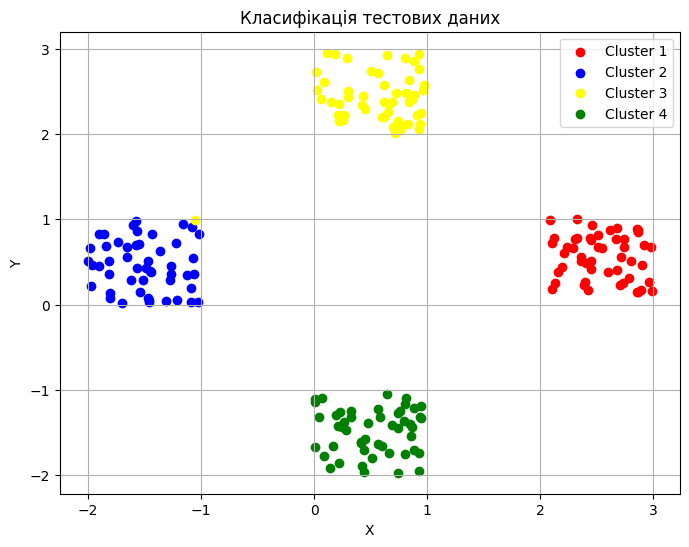

In [49]:
# Генерація тестових даних (аналогічно до тренувальних даних)
x1_test = 2 + np.random.rand(50)
y1_test = 0 + np.random.rand(50)

x2_test = -2 + np.random.rand(50)
y2_test = 0 + np.random.rand(50)

x3_test = 0 + np.random.rand(50)
y3_test = 2 + np.random.rand(50)

x4_test = 0 + np.random.rand(50)
y4_test = -2 + np.random.rand(50)

# Об'єднуємо тестові дані в один масив
X_test = np.vstack((np.column_stack((x1_test, y1_test)),
                    np.column_stack((x2_test, y2_test)),
                    np.column_stack((x3_test, y3_test)),
                    np.column_stack((x4_test, y4_test))))

# Виконуємо передбачення на тестових даних
y_pred_test = model.predict(X_test)

# Перетворюємо ймовірності softmax у мітки класів
y_pred_classes = np.argmax(y_pred_test, axis=1)

# Візуалізація результатів класифікації на тестових даних
plt.figure(figsize=(8, 6))

# Масиви для різних кольорів передбачених класів
colors = ['red', 'blue', 'yellow', 'green']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Розбиваємо передбачені точки по класах і будуємо графік
for i in range(4):
    cluster_points = X_test[y_pred_classes == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=labels[i])

# Налаштування графіку
plt.grid(True)
plt.legend()
plt.title('Класифікація тестових даних')
plt.xlabel('X')
plt.ylabel('Y')

# Відображення графіку
plt.show()
